## Monopoly Board Game Analysis

We bought this game about a month ago and I discovered something about myself.

I suck at it. Absolutely suck at it. We have probably played it about 50 times and I have won once. Just once. I blame it on the roll of dice. It depends on luck I say. But does it really? So it is part annoyance and part curiosity that led me to doing this

### Simple Simulation

Checking the probability of landing on a position based on roll of double dice for a very big number of roll of dice. (~100000)

In [2]:
import pandas as pd
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [4]:
places = np.zeros(40, dtype=int)
position = 0
for i in range(1, 100000):
    d1 = randint(1, 6) #Dice 2
    d2 = randint(1, 6) #Dice 1
    d = d1 + d2
    position += d
    if position == 30:  # Jail position
        places[position] += 1 # Actually in Jail taken away
        position = 10 # But the position is set to 10 which is actually the jail
    elif position >= 40:
        position -= 40  # Resetting once Go is reached
        places[position] += 1
    else:
        places[position] += 1 # All other cases. Because actually in jail is taken apart from the place


<BarContainer object of 40 artists>

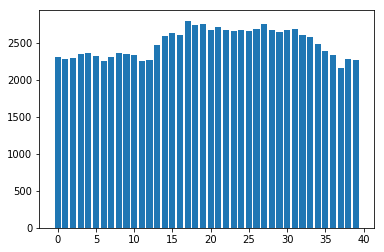

In [56]:
y_pos = np.arange(40)
plt.bar(y_pos,places)

In [20]:
names = ['Go', 'Mediterranean', 'Chest', 'Balt', 'IT', 'Rail']
color_type = ['Go','Brown','Chest/Chance','Brown','Tax','Railroad','Blue','Chest/Chance','Blue','Blue','Jail','Pink','Utility','Pink','Pink','Railroad','Orange','Chest/Chance','Orange','Orange','Go','Red','Chest/Chance','Red','Red','Railroad','Yellow','Yellow','Utility','Yellow','Jail','Green','Green','Chest/Chance','Green','Railroad','Chest/Chance','DBlue','Tax','DBlue']
color_palette = pd.DataFrame({'Type':['Go','Brown','Chest/Chance','Tax','Railroad','Blue','Jail','Pink','Utitlity','Orange','Red','Yellow','Green','DBlue'],
'color':['#FFFFFF','#7E4F2C','#DD0079','#00534B','#000000','#2ADEFF','#B6B6B6','#FF82B2','#7503AB','#FF8225','E00000','#FFEA25','#75ED11','#003895']})
data = pd.DataFrame({'Type':color_type,'value':places})

In [17]:
color_palette

,color_type,color
0,Go,#FFFFFF
1,Brown,#7E4F2C
2,Chest/Chance,#DD0079
3,Tax,#00534B
4,Railroad,#000000
5,Blue,#2ADEFF
6,Jail,#B6B6B6
7,Pink,#FF82B2
8,Utitlity,#7503AB
9,Orange,#FF8225


([<matplotlib.axis.XTick at 0x7f70348ab908>,
 <a list of 14 Text xticklabel objects>)

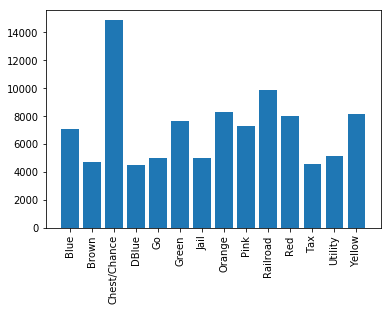

In [6]:
consolidate = data.groupby('Type', as_index=False)[['value']].sum()

y_pos = np.arange(14)
plt.bar(y_pos,consolidate['value'])
plt.xticks(y_pos, consolidate['Type'], rotation = 90)

CHECK HOW THE COMBINED PROBABILITY OF THE COLORED PLACES ARE.......................

It looks like there is an almost even chance to land on any of the positions. But our experience wasn't such. We need to also look at the distribution of landing on each of these places wrt to time. We can only sustain in the game when we can withstand the beginning landings... (bleh, But you get the point?)

So distribution wrt to time. Is that even a thing?


Although the probability of landing on any given space is all evened out, what is also important to see is how does this porbability change with time (as the game progresses). Because what is more important is to be able to sustain in the game long enough to actually reach a point where this probability is evened out.

In [7]:
t_places = np.zeros((40,30), dtype=int)
for i in range(1,100000): # Repeat timeline simulation 100 times
    position = 0
    for j in range(0,30): # For 500 time points
        d1 = randint(1, 6)  # Dice 2
        d2 = randint(1, 6)  # Dice 1
        d = d1 + d2
        position += d
        if position == 30:  # Jail position
            t_places[position,j] += 1  # Actually in Jail taken away
            position = 10  # But the position is set to 10 which is actually the jail
        elif position >= 40:
            position -= 40  # Resetting once Go is reached
            t_places[position,j] += 1
        else:
            t_places[position,j] += 1


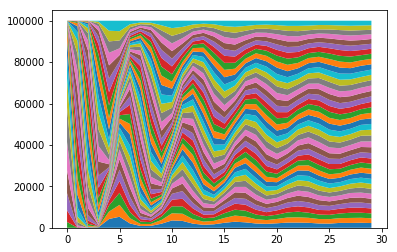

In [8]:
x = range(0,30)
fig, ax = plt.subplots()
ax.stackplot(x, t_places)
plt.show()

In [23]:
data = pd.DataFrame(t_places)
data['Type'] = color_type
temp = data.groupby('Type', as_index=False).sum()
consolidate = pd.merge(temp, color_palette, on='type')
x = range(0,30)
plt.stackplot(x, consolidate.iloc[:,1:31], colors = consolidate['color'])

plt.show()



KeyError: 'type'

In [24]:
color_palette

,Type,color
0,Go,#FFFFFF
1,Brown,#7E4F2C
2,Chest/Chance,#DD0079
3,Tax,#00534B
4,Railroad,#000000
5,Blue,#2ADEFF
6,Jail,#B6B6B6
7,Pink,#FF82B2
8,Utitlity,#7503AB
9,Orange,#FF8225
